In [1]:
# 대한민국 100대 통계지표
# http://ecos.bok.or.kr/jsp/vis/keystat/#/key

In [2]:
# 1. '국민소득, 경기, 기업경영' 항목의 경제지표 타이틀을 출력
# 2. '국민소득, 경기, 기업경영' 항목의 경제지표 중 임의의 한 경제지표를 입력 받은 후
# 3. 선택한 경제지표의 상세 정보를 페이지로 이동
# 4. 연도별 경제지표 표를 크로링해서 출력

In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import time
import requests

In [5]:
driver = webdriver.Chrome('./chromedriver')
driver.get('http://ecos.bok.or.kr/jsp/vis/keystat/#/key')

In [31]:
elems = driver.find_elements_by_css_selector('a.a-c1-list.ng-binding')
elems

[<selenium.webdriver.remote.webelement.WebElement (session="821ff06e9e7eae9901bee1bf9adb6d3f", element="5664f311-75fb-47f3-b3c3-aa1bc4a2de83")>,
 <selenium.webdriver.remote.webelement.WebElement (session="821ff06e9e7eae9901bee1bf9adb6d3f", element="52fecfca-3753-45c0-be7f-5610c09468ad")>,
 <selenium.webdriver.remote.webelement.WebElement (session="821ff06e9e7eae9901bee1bf9adb6d3f", element="b3c0b67d-5af9-46b5-a531-4bbad19601f9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="821ff06e9e7eae9901bee1bf9adb6d3f", element="e1a53d1f-16a2-4baa-b8f2-c4c702050160")>,
 <selenium.webdriver.remote.webelement.WebElement (session="821ff06e9e7eae9901bee1bf9adb6d3f", element="e35e2a9b-ede1-4c38-9ddc-b6460a528774")>,
 <selenium.webdriver.remote.webelement.WebElement (session="821ff06e9e7eae9901bee1bf9adb6d3f", element="4174accf-b0bc-4687-8927-bd1ed3c99683")>,
 <selenium.webdriver.remote.webelement.WebElement (session="821ff06e9e7eae9901bee1bf9adb6d3f", element="ba7a266a-5580-4aa5-939b-e1

In [32]:
for e in elems:
    print(e.text)

경제성장률(실질, 계절조정 전기대비) ('20.2/4)
민간소비증감률(실질, 계절조정 전기대비) ('20.2/4)
설비투자증감률(실질, 계절조정 전기대비) ('20.2/4)
건설투자증감률(실질, 계절조정 전기대비) ('20.2/4)
GDP(명목, 계절조정) ('20.2/4)
GDP디플레이터 ('20.2/4)
1인당GNI ('19)
총저축률 ('20.2/4)
국내총투자율 ('20.2/4)
수출입의 대 GNI 비율 ('19)
제조업업황실적BSI ('20.09)
소비자심리지수 ('20.09)
경제심리지수 ('20.09)
경기동행지수순환변동치 ('20.08)
경기선행지수순환변동치 ('20.08)
제조업부채비율 ('18)
제조업매출액세전순이익률 ('18)
제조업매출액증감률 ('18)


In [27]:
# '국민소득, 경기, 기업경영' section의 지표를 선택하고 상세 페이지에서 상세 정보 출력

In [33]:
eco_index = input("'국민소득, 경기, 기업경영' 관련 경제지표를 선택하세요 ")

'국민소득, 경기, 기업경영' 관련 경제지표를 선택하세요 총저축률 ('20.2/4)


In [35]:
for e in elems:
    if eco_index == e.text:
        e.click()
        break

In [36]:
html = driver.page_source

In [37]:
soup = bs(html, 'html.parser')

In [41]:
tags = soup.select('tr.ng-scope')
len(tags)

20

In [45]:
result = []
for t in tags:
    print(t.text.split('\n')[1:4])
    result.append(t.text.split('\n')[1:4])

['2015.3/4', '36.9', '0.8']
['2015.4/4', '35.8', '-1.1']
['2016.1/4', '37.0', '1.2']
['2016.2/4', '37.2', '0.2']
['2016.3/4', '36.2', '-1.0']
['2016.4/4', '36.9', '0.7']
['2017.1/4', '37.3', '0.4']
['2017.2/4', '36.6', '-0.7']
['2017.3/4', '37.7', '1.1']
['2017.4/4', '36.7', '-1.0']
['2018.1/4', '35.9', '-0.8']
['2018.2/4', '36.0', '0.1']
['2018.3/4', '36.3', '0.3']
['2018.4/4', '35.5', '-0.8']
['2019.1/4', '34.7', '-0.8']
['2019.2/4', '34.7', '0.0']
['2019.3/4', '35.0', '0.3']
['2019.4/4', '34.4', '-0.6']
['2020.1/4', '36.0', '1.6']
['2020.2/4', '34.5', '-1.5']


In [48]:
import pandas as pd

df = pd.DataFrame(result, columns = ['시점', '지표', '전기대비증감'])
df.head()

,시점,지표,전기대비증감
0,2015.3/4,36.9,0.8
1,2015.4/4,35.8,-1.1
2,2016.1/4,37.0,1.2
3,2016.2/4,37.2,0.2
4,2016.3/4,36.2,-1.0


In [50]:
df['지표']

0     36.9
1     35.8
2     37.0
3     37.2
4     36.2
5     36.9
6     37.3
7     36.6
8     37.7
9     36.7
10    35.9
11    36.0
12    36.3
13    35.5
14    34.7
15    34.7
16    35.0
17    34.4
18    36.0
19    34.5
Name: 지표, dtype: object

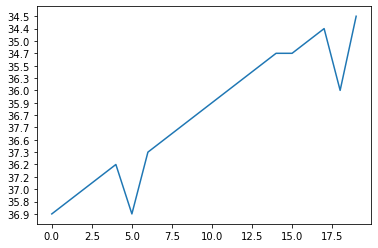

In [51]:
import matplotlib.pyplot as plt
plt.plot(df['지표'].values)